<a href="https://colab.research.google.com/github/u0sama/Support-and-Resistance-Plot-of-Symbol/blob/main/Support_Resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#user input
Symbol = 'SPY'
Start = "2021-11-1"
To = "2021-12-21"
#Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
Granularity= "1d"

In [2]:
%pip install yfinance
%pip install mpl_finance


     |████████████████████████████████| 6.4 MB 15.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [49]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt# get stock prices using yfinance library
plt.rcParams['figure.figsize'] = [16, 12]

plt.rc('font', size=14) 
df = yf.download(Symbol, start= Start,end= To, threads= False)
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close
Date,,,,,
2021-11-01,738095.0,460.299988,460.700012,458.200012,460.040009
2021-11-02,738096.0,460.220001,462.230011,460.079987,461.899994
2021-11-03,738097.0,461.299988,465.149994,460.829987,464.720001
2021-11-04,738098.0,465.359985,467.000000,464.989990,466.910004
2021-11-05,738099.0,469.279999,470.649994,466.920013,468.529999
2021-11-08,738102.0,469.700012,470.230011,468.200012,468.929993
2021-11-09,738103.0,469.320007,469.570007,465.880005,467.380005
2021-11-10,738104.0,465.579987,467.380005,462.040009,463.619995
2021-11-11,738105.0,465.209991,465.290009,463.750000,463.769989


In [50]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [51]:
levels = []
levelr = []
levelsp = []
levelre= []
a=1
b=1
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    
    levels.append((i,df['Low'][i]))
    levelsp.append((a,df['Low'][i]))
    a=a+1


  elif isResistance(df,i):
  
    levelr.append((i,df['High'][i]))
    levelre.append((b,df['High'][i]))
    b=b+1

In [52]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='green', label= "le")
  #plt.text(max(df['Date']), df['Date'][level[0]], ' somelabel1')

    
  for level in levelr:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='red')
    plt.title(Symbol)
    
  fig.show()

Supports Points
[(1, 462.0400085449219), (2, 460.25)]
Resistant Points
[(1, 470.6499938964844), (2, 472.8699951171875)]


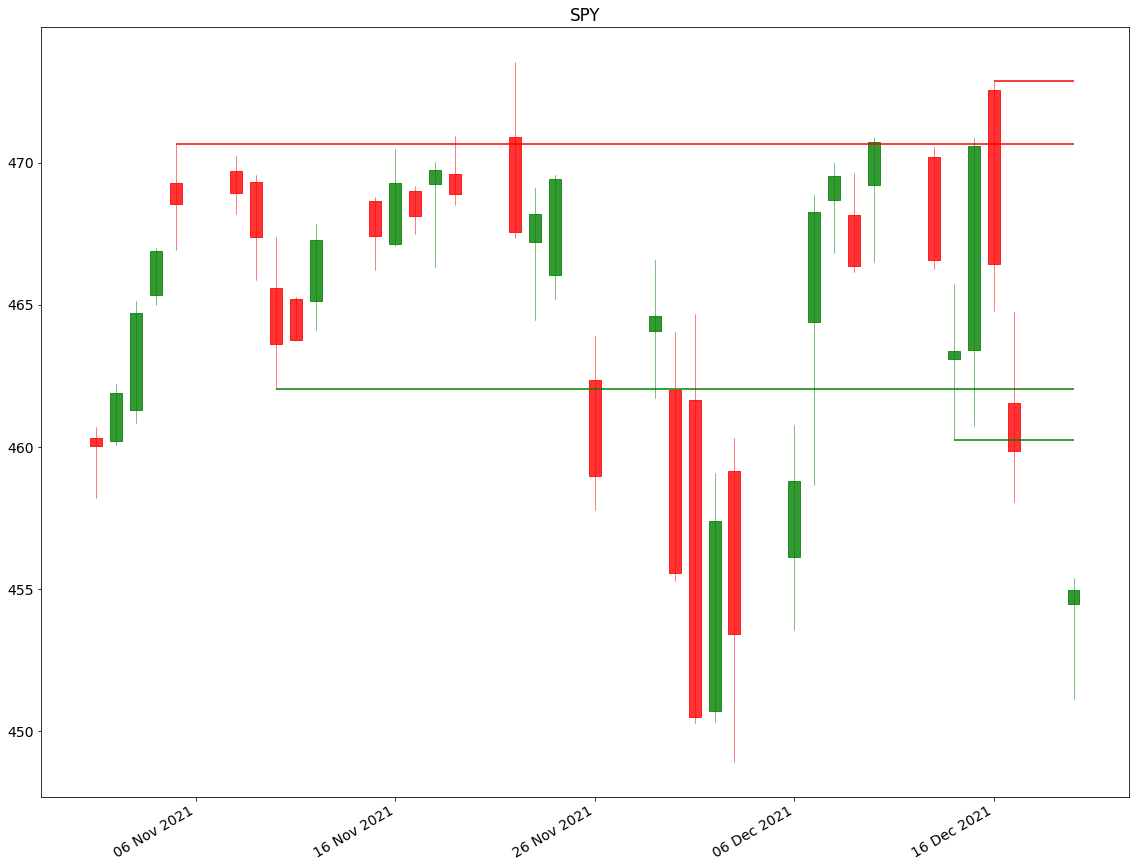

In [53]:
print ("Supports Points")

print(levelsp)
print ("Resistant Points") 
print(levelre)



plot_all()

